Let's gather a few datasets from the ISIC database
# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

To install the isic Datasets we will use their CLI

In [ ]:
!pip install isic-cli

# Metadata loading & Analysis

Before we start looking at the photos, let's gather a few datasets and evaluate the demographic metadata that we have.  For the purposes of this project, we're going to focus on age, gender, and the location of the skin lesion.
We'll focus on the following datasets
- [BCN 20000](https://www.nature.com/articles/s41597-024-03387-w)
- [HAM10000](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)
- [ISIC 2024](https://challenge2024.isic-archive.com/)
- [Hospital Italiano de Buenos Aires Skin Lesions](https://www.nature.com/articles/s41597-023-02630-0)

# Dataset Downloads

International Skin Imaging Collaboration (ISIC) archive is a massive resource for images and metadata for our project.  Let's take a quick look at the available data.

In [ ]:
!isic collection list

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\BCN\MetaData', exist_ok=True)
BCN_id = 249
!isic metadata download -c {BCN_id} -o "E:\Capstone Skin Cancer Project\Datasets\BCN\MetaData\BCN_Metadata.csv"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\BCN\Image', exist_ok=True)
!isic image download --collections 249 "E:\Capstone Skin Cancer Project\Datasets\BCN\Image"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\HAM\MetaData', exist_ok=True)
HAM_id = 212
!isic metadata download -c {HAM_id} -o "E:\Capstone Skin Cancer Project\Datasets\HAM\MetaData\HAM_Metadata.csv"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\HAM\Image', exist_ok=True)
!isic image download --collections 212 "E:\Capstone Skin Cancer Project\Datasets\HAM\Image"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\BuenosAires\MetaData', exist_ok=True)
BA_id = 390
!isic metadata download -c {BA_id} -o "E:\Capstone Skin Cancer Project\Datasets\BuenosAires\MetaData\BA_Metadata.csv"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\BuenosAires\Image', exist_ok=True)
!isic image download --collections {BA_id} "E:\Capstone Skin Cancer Project\Datasets\BuenosAires\Image"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\Braff\MetaData', exist_ok=True)
Braff_id = 410
!isic metadata download -c {Braff_id} -o "E:\Capstone Skin Cancer Project\Datasets\Braff\MetaData\Braff_Metadata.csv"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\Braff\Image', exist_ok=True)
!isic image download --collections {Braff_id} "E:\Capstone Skin Cancer Project\Datasets\Braff\Image"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\Melo\MetaData', exist_ok=True)
melo_id = 294
!isic metadata download -c {melo_id} -o "E:\Capstone Skin Cancer Project\Datasets\Melo\MetaData\Melo_Metadata.csv"

In [ ]:
os.makedirs(r'E:\Capstone Skin Cancer Project\Datasets\Melo\Image', exist_ok=True)
!isic image download --collections {melo_id} "E:\Capstone Skin Cancer Project\Datasets\Melo\Image"

Lets take a look at the data columns that we currently have, then clean the data up so we can keep the items that we will be looking for to see if there's any correlation between the data points and cancer.

In [ ]:
BCN = pd.read_csv(r'E:\Capstone Skin Cancer Project\Datasets\BCN\MetaData\BCN_Metadata.csv')
BCN.head(5)

In [ ]:
HAM = pd.read_csv(r'E:\Capstone Skin Cancer Project\Datasets\HAM\MetaData\HAM_Metadata.csv')
HAM.head(5)

In [ ]:
BA = pd.read_csv(r'E:\Capstone Skin Cancer Project\Datasets\BuenosAires\MetaData\BA_Metadata.csv', low_memory=False)
BA.head(5)

In [ ]:
BRAFF = pd.read_csv(r'E:\Capstone Skin Cancer Project\Datasets\Braff\MetaData\Braff_Metadata.csv')
BRAFF.head(5)

In [ ]:
MELO = pd.read_csv(r'E:\Capstone Skin Cancer Project\Datasets\Melo\MetaData\Melo_Metadata.csv', low_memory=False)
MELO.head(5)

After all data has been read, we'll make a function to format all of the data

In [ ]:
columns_to_keep = ['isic_id', 'age_approx', 'sex', 'anatom_site_general', 'diagnosis_1', 'diagnosis']


def dataFormatting(table):
	if 'diagnosis' not in table.columns and 'diagnosis_2' in table.columns:
		table['diagnosis'] = table['diagnosis_2']

	# Update 'diagnosis' column if it's blank by using the value from 'diagnosis_1'
	table.loc[table['diagnosis'].isna(), 'diagnosis'] = table['diagnosis_1']

	table = table.dropna(subset=columns_to_keep)  # Drop any columns that don't have the data we need.

	formatted_table = table[columns_to_keep]
	formatted_table = formatted_table.rename(columns={'age_approx':          'Age',
	                                                  'sex':                 'Gender',
	                                                  'anatom_site_general': 'Location',
	                                                  'diagnosis_1':         'Benign/Malignant',
	                                                  'diagnosis':           'Diagnosis'
	                                                  })

	formatted_table['Age'] = formatted_table['Age'].astype(int)
	return formatted_table

Lets make one more helper function to find out how many rows are in each table

In [ ]:
def rowCount(tables):
	for name, table in tables.items():
		print(f"{name} has {table.shape[0]} rows")
	total_rows = sum(table.shape[0] for table in tables.values())
	print(f"There are a total of {total_rows} rows in all tables")

In [ ]:
formatted_BCN = dataFormatting(BCN)
formatted_BCN.head(5)

In [ ]:
formatted_HAM = dataFormatting(HAM)
formatted_BCN.head(5)

In [ ]:
formatted_MELO = dataFormatting(MELO)
formatted_BCN.head(5)

In [ ]:
formatted_BA = dataFormatting(BA)
formatted_BA.head(5)

In [ ]:
formatted_BRAFF = dataFormatting(BRAFF)
formatted_BCN.head(5)

In [ ]:
tables = {
		"BCN":   formatted_BCN,
		"HAM":   formatted_HAM,
		"MELO":  formatted_MELO,
		"BRAFF": formatted_BRAFF,
		"BA":    formatted_BA
}
rowCount(tables)

In [ ]:
all_data = pd.concat([formatted_BCN, formatted_HAM, formatted_MELO, formatted_BRAFF, formatted_BA], ignore_index=True)
all_data.to_csv(r'E:\Capstone Skin Cancer Project\Datasets\all_datasets_combined.csv', index=False)

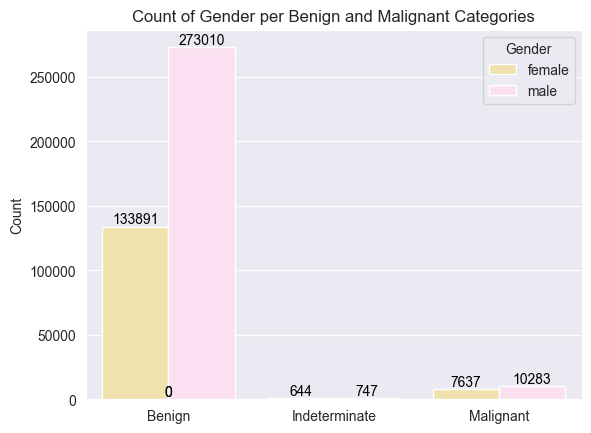

In [89]:
# Group data by 'Gender' and 'Benign/Malignant' and count occurrences
gender_bm_counts = all_data.groupby([
		'Gender',
		'Benign/Malignant']).size().reset_index(name='Count')

# Create the bar plot
ax = sns.barplot(
		data=gender_bm_counts,
		x='Benign/Malignant',
		y='Count',
		hue='Gender',
		palette=['#FBE8A1', '#FFDCF4']
)

# Add bar labels
for bar in ax.patches:
	count = int(bar.get_height())
	ax.text(
			bar.get_x() + bar.get_width() / 2,
			count,
			f"{count}",
			ha='center',
			va='bottom',
			fontsize=10,
			color='black'
	)

# Add legend with proper title
plt.legend(title="Gender", loc='upper right')

# Add axis labels and title
plt.xlabel("")
plt.ylabel("Count")
plt.title("Count of Gender per Benign and Malignant Categories")

# Show the plot
plt.show()